In [21]:
import pandas as pd
from pandas import Series,DataFrame
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table(r'ratings.dat',sep ="::",header = None,names = rnames,engine = 'python')
ratings[:3]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [22]:
data = ratings.pivot(index = 'user_id',columns = 'movie_id',values = 'rating')
data[:5]

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.loc[4169].corr(data.loc[424])

0.45663851303413394

In [24]:
test = data.reindex([424,4169],columns = data.loc[4169][data.loc[424].notnull()].dropna().index)
test

movie_id,2,6,10,11,12,17,21,22,25,32,...,3919,3925,3927,3928,3930,3932,3933,3935,3948,3949
user_id,,,,,,,,,,,,,,,,,,,,,
424,4.0,4.0,4.0,4.0,1.0,5.0,3.0,3.0,4.0,5.0,...,2.0,4.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,5.0
4169,3.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,5.0,4.0,...,3.0,1.0,5.0,5.0,2.0,5.0,3.0,4.0,4.0,5.0


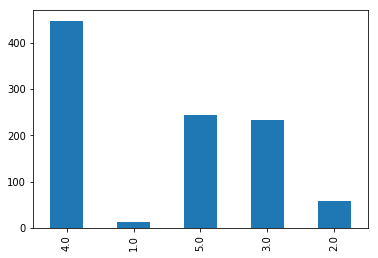

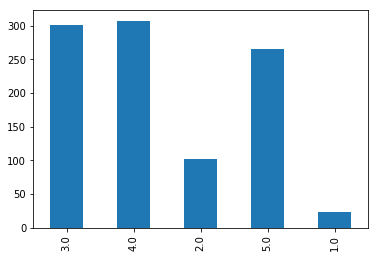

In [25]:
import matplotlib.pyplot as plt
test.loc[424].value_counts(sort = False).plot(kind = 'bar')
plt.show()
test.loc[4169].value_counts(sort = False).plot(kind = 'bar')
plt.show()

In [26]:
import numpy as np
periods_test = DataFrame(np.zeros((20,7)),columns = [10,20,50,100,200,500,998])
for i in periods_test.index:
    for j in periods_test.columns:
        sample = test.reindex(columns = np.random.permutation(test.columns)[:j])
        periods_test.loc[i,j] = sample.iloc[0].corr(sample.iloc[1])
periods_test[:5]

,10,20,50,100,200,500,998
0,0.704361,0.443189,0.570962,0.370305,0.457593,0.440356,0.456639
1,0.526787,0.417029,0.514246,0.466065,0.393780,0.362988,0.456639
2,0.111979,0.523114,0.466816,0.540843,0.559047,0.470351,0.456639
3,0.428571,0.576583,0.364687,0.398405,0.378559,0.437661,0.456639
4,0.730487,-0.105266,0.302975,0.511926,0.504197,0.463140,0.456639


In [27]:
periods_test.describe()

,10,20,50,100,200,500,998
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,0.518897,0.398208,0.491752,0.442812,0.460148,0.451277,4.566385e-01
std,0.258279,0.266054,0.084516,0.068587,0.051372,0.035431,1.241267e-16
min,0.000000,-0.267194,0.302975,0.313624,0.378559,0.362988,4.566385e-01
25%,0.333282,0.411092,0.461022,0.397073,0.421632,0.439682,4.566385e-01
50%,0.553966,0.480876,0.495873,0.448186,0.455397,0.458664,4.566385e-01
75%,0.718760,0.566935,0.534895,0.497003,0.501466,0.472834,4.566385e-01
max,0.915931,0.643763,0.650611,0.540843,0.559047,0.495075,4.566385e-01


In [28]:
check_size = 1000
check = {}
check_data = data.copy()#复制一份data用于检验，以免篡改原数据
check_data = check_data.loc[check_data.count(axis=1)>200]#滤除评价数小于200的用户
for user in np.random.permutation(check_data.index):
    movie = np.random.permutation(check_data.loc[user].dropna().index)[0]
    check[(user,movie)] = check_data.loc[user,movie]
    check_data.loc[user,movie] = np.nan
    check_size -=1
    if not check_size:
        break
corr = check_data.T.corr(min_periods = 200)
corr_clean = corr.dropna(how = 'all')
corr_clean = corr_clean.dropna(axis=1,how='all')#删除全空的行和列
check_ser = Series(check)#这是被提取出来的1000个真实评分
check_ser[:5]


10  3155    5.0
15  2115    4.0
17  1779    2.0
23  2912    3.0
33  1625    2.0
dtype: float64

In [29]:
result = Series(np.nan,index = check_ser.index)
for user,movie in result.index:
    prediction = []
    if user in corr_clean.index:
        corr_set = corr_clean[user][corr_clean[user]>0.1].dropna()#仅限大于0.1的用户
    else:continue
    for other in corr_set.index:
        if not np.isnan(data.loc[other,movie]) and other != user:#注意bool(np.nan)==True
            prediction.append((data.loc[other,movie],corr_set[other]))
    if prediction:
        result[(user,movie)] = sum([value*weight for value,weight in prediction])/sum([pair[1] for pair in prediction])

result.dropna(inplace=True)
len(result)#随机抽取的1000个用户中也有被min_periods=200刷掉的

856

In [30]:
result[:5]

10  3155    3.656564
23  2912    4.100671
33  1625    3.841959
36  2118    3.602255
45  1028    4.173120
dtype: float64

In [31]:
result

10    3155    3.656564
23    2912    4.100671
33    1625    3.841959
36    2118    3.602255
45    1028    4.173120
48    1994    3.732544
53    920     3.837767
73    2826    3.092418
92    2710    2.977991
117   1376    3.664710
118   2194    4.290143
123   1127    3.615882
131   3429    4.433906
146   2640    3.642887
149   1263    4.115262
150   446     4.395099
151   3950    3.758520
161   36      4.409826
163   1866    2.930228
166   2346    3.532662
173   908     4.447495
175   2010    4.359515
181   3039    3.896924
187   3418    3.962042
192   1653    3.689134
195   3699    3.384245
198   1968    3.879086
202   2906    2.065020
204   2105    3.125063
216   2889    3.520590
                ...   
5837  44      2.544373
5838  314     5.000000
5841  1690    2.985865
5848  3114    4.208409
5854  1702    2.247046
5878  2916    3.733351
5880  3707    2.898449
5881  1027    3.420998
5888  2096    3.701503
5915  231     3.242322
5916  1228    4.189592
5917  1073    3.481510
5922  923  

In [32]:
result.corr(check_ser.reindex(result.index))

0.45666539760252595

In [33]:
(result-check_ser.reindex(result.index)).abs().describe()#推荐期望与实际评价之差的绝对值

count    856.000000
mean       0.786140
std        0.625544
min        0.000000
25%        0.302707
50%        0.661781
75%        1.092193
max        3.116024
dtype: float64

In [36]:
corr = data.T.corr(min_periods = 200)
corr_clean = corr.dropna(how = 'all')
corr_clean = corr_clean.dropna(axis = 1,how = 'all')
lucky = np.random.permutation(corr_clean.index)[0]
gift = data.loc[lucky]
gift = gift[gift.isnull()]#现在gift是一个全空的序列
corr_lucky = corr_clean[lucky].drop(lucky)
corr_lucky = corr_lucky[corr_lucky>0.1].dropna()
for movie in gift.index:
    prediction = []
    for other in corr_lucky.index:
        if not np.isnan(data.loc[other,movie]):
            prediction.append((data.loc[other,movie],corr_clean[lucky][other]))
    if prediction:
        gift[movie] = sum([value*weight for value,weight in prediction])/sum([pair[1] for pair in prediction])
        
gift.dropna().sort_values(ascending = False)

movie_id
2569    5.000000
2830    5.000000
3293    5.000000
2930    5.000000
1795    5.000000
3585    5.000000
981     5.000000
3443    5.000000
696     5.000000
682     5.000000
666     5.000000
3245    5.000000
1553    5.000000
1420    5.000000
3338    4.916254
2175    4.755886
1138    4.639810
214     4.638452
3492    4.619994
1725    4.613783
363     4.597476
2905    4.585231
966     4.538926
745     4.502968
1076    4.502520
3517    4.497040
904     4.485950
750     4.475979
3307    4.467627
2594    4.459806
          ...   
1311    1.000000
1720    1.000000
3463    1.000000
3460    1.000000
1383    1.000000
3376    1.000000
3232    1.000000
1773    1.000000
1430    1.000000
2217    1.000000
2213    1.000000
660     1.000000
3202    1.000000
3666    1.000000
3027    1.000000
3486    1.000000
591     1.000000
3026    1.000000
1164    1.000000
3533    1.000000
975     1.000000
2960    1.000000
3574    1.000000
3777    1.000000
2777    1.000000
2039    1.000000
2934    1.000000
843  